This is a replica of the code from Feature Engineering for Macine Learning by Alice Zheng & Amanda Casari published by O'Reilly
Chapter 8: Automating the Featurizer: Image Feature Extraction and Deep Learning

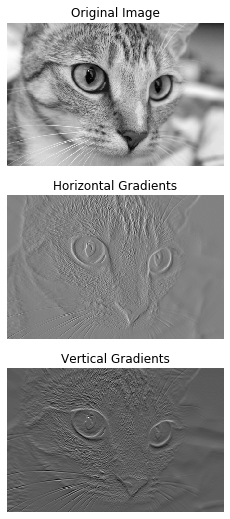

In [1]:
#Example 8-1: Calculating simple image gradients using Python

import matplotlib.pyplot as plt
import numpy as np
from skimage import data, color

# Load Example Image, turn it into a grayscale image

image = color.rgb2gray(data.chelsea())

# Compute horizontal gradient using centered 1D filter
# This is = to replacying each non-border pixel with the difference between its right and left neighbor.
# The leftmost and rightmost edges have a gradient = 0
gx = np.empty(image.shape, dtype=np.double)
gx[:,0] = 0
gx[:,-1] = 0
gx[:,1:-1] = image[:,:-2] - image[:,2:]

# same for vertical alignment
gy = np.empty(image.shape,dtype=np.double)
gy[0,:] = 0
gy[-1,:] = 0
gy[1:-1,:] = image[:-2,:] - image[2:,:]

## Matploblib incantations
fig,(ax1,ax2,ax3) = plt.subplots(3,1
                                 ,figsize=(5,9)
                                 ,sharex=True
                                 ,sharey=True)
ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_adjustable('box')

ax2.axis('off')
ax2.imshow(gx, cmap=plt.cm.gray)
ax2.set_title('Horizontal Gradients')
ax2.set_adjustable('box')

ax3.axis('off')
ax3.imshow(gy, cmap=plt.cm.gray)
ax3.set_title('Vertical Gradients')
ax3.set_adjustable('box')

[[-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]]


 [[0.36787944 0.53526143 0.60653066 0.53526143 0.36787944]
 [0.53526143 0.77880078 0.8824969  0.77880078 0.53526143]
 [0.60653066 0.8824969  1.         0.8824969  0.60653066]
 [0.53526143 0.77880078 0.8824969  0.77880078 0.53526143]
 [0.36787944 0.53526143 0.60653066 0.53526143 0.36787944]]


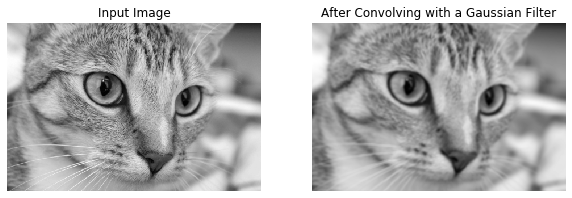

In [11]:
# Example 8-2: Applying a simple Gaussian filter on an image

# Step 1: create x,y mesh grids of size 5x5 to compute 
# Gaussian
ind = [-1.,-0.5,0.,0.5,1.]
X,Y = np.meshgrid(ind,ind)
print(X)
# G - simple, unnormalizedd Gaussian kernel where the value
# at (0,0) = 1
G=np.exp(-(np.multiply(X,X) + np.multiply(Y,Y))/2)
print("\n\n",G)

from scipy import signal
blurred_cat = signal.convolve2d(image,G,mode='valid')

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4),sharex=True,sharey=True)
ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input Image')
ax1.set_adjustable('box')

ax2.axis('off')
ax2.imshow(blurred_cat, cmap=plt.cm.gray)
ax2.set_title("After Convolving with a Gaussian Filter")
ax2.set_adjustable('box')